In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2

In [7]:
image_dir = './images'
images = os.listdir(image_dir)
images

['KakaoTalk_20240530_125615705.jpg',
 'KakaoTalk_20240530_125615705_01.jpg',
 'KakaoTalk_20240530_125615705_02.jpg',
 'KakaoTalk_20240530_125615705_03.jpg',
 'KakaoTalk_20240530_125615705_04.jpg',
 'KakaoTalk_20240530_125615705_05.jpg',
 'KakaoTalk_20240530_125615705_06.jpg',
 'KakaoTalk_20240530_125615705_07.jpg',
 'KakaoTalk_20240530_125615705_08.jpg',
 'KakaoTalk_20240530_125615705_09.jpg',
 'KakaoTalk_20240530_125615705_10.jpg',
 'KakaoTalk_20240530_125615705_11.jpg',
 'KakaoTalk_20240530_125615705_12.jpg',
 'KakaoTalk_20240530_125615705_13.jpg',
 'KakaoTalk_20240530_125615705_14.jpg',
 'KakaoTalk_20240530_125615705_15.jpg',
 'KakaoTalk_20240530_125615705_16.jpg',
 'KakaoTalk_20240530_125615705_17.jpg',
 'KakaoTalk_20240530_125615705_18.jpg',
 'KakaoTalk_20240530_125615705_19.jpg',
 'KakaoTalk_20240530_125615705_20.jpg']

In [3]:
def detect_markers(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)
    parameters = cv2.aruco.DetectorParameters_create()
    corners, ids, _ = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    return image, corners, ids

In [4]:
for image in images:
    image_path = os.path.join(image_dir, image)
    image, corners, ids = detect_markers(image_path)

In [98]:
image_path = os.path.join(image_dir, images[-4])
image, corners, ids = detect_markers(image_path)
len(corners)*4


76

In [87]:

# with open('data.sift', 'w') as output:
#     output.write(f'{len(corners)*4} 128\n')

#     for image in images:
#         image_path = os.path.join(image_dir, image)
#         image, corners, ids = detect_markers(image_path)
#         for corner in corners:
#             # 특징점 위치
#             for c in corner[0]:
#                 output.write(f'{c[0]} {c[1]} 0 0\n')
#                 # descriptor 128개의 0
#                 for i in range(128):
#                     output.write(f' 0')
#                 output.write(f'\n')


for image in images:
    image_path = os.path.join(image_dir, image)
    image, corners, ids = detect_markers(image_path)

    _image_path = image_path.split('.')[1]

    with open(f'.{_image_path}.txt', 'w') as output:
        output.write(f'{len(corners)*4} 128\n')

        image_path = os.path.join(image_dir, images[-1])
        image, corners, ids = detect_markers(image_path)
        for corner in corners:
            # 특징점 위치
            for c in corner[0]:
                output.write(f'{c[0]} {c[1]} 0 0\n')
                # descriptor 128개의 0
                for i in range(128):
                    output.write(f' 0')
                output.write(f'\n')

In [63]:
image_path.split('.')

['', '/images\\KakaoTalk_20240530_125615705_20', 'jpg']

In [118]:
current_dir = os.getcwd()
image_1_dir = os.path.join(current_dir, 'images', images[-4])
image_2_dir = os.path.join(current_dir, 'images', images[-5])

In [121]:
def find_match_points(corners_1, ids_1, corners_2, ids_2):
    matching_ids = []
    matching_idx_1 = []
    matching_idx_2 = []
    matching_corners_1 = []
    matching_corners_2 = []

    for i in range(len(ids_1)):
        for j in range(len(ids_2)):
            if ids_1[i] == ids_2[j]:
                matching_ids.append(ids_1[i])

                matching_corners_1.append(corners_1[i].reshape(-1, 2))
                matching_corners_2.append(corners_2[j].reshape(-1, 2))
                
                matching_idx_1.append((4*i, 4*i+1, 4*i+2, 4*i+3))
                matching_idx_2.append((4*j, 4*j+1, 4*j+2, 4*j+3))

    # Now we have the matching IDs and corresponding corner points
    # You can use these lists for further processing with the 5-point algorithm
    matching_corners_1 = np.array(matching_corners_1).reshape(-1, 2)
    matching_corners_2 = np.array(matching_corners_2).reshape(-1, 2)


    return matching_ids, matching_idx_1, matching_idx_2, matching_corners_1, matching_corners_2


# # camera matrix
# K = np.array(
#     [[3.28261164e3, 0, 2.02403056e3], [0, 3.28885353e3, 1.45308413e3], [0, 0, 1]]
# )

image_path = os.path.join(image_dir, images[-1])
image_1, corners_1, ids_1 = detect_markers(image_path)
image_path = os.path.join(image_dir, images[-2])
image_2, corners_2, ids_2 = detect_markers(image_path)
_matching_ids, matching_idx_1, matching_idx_2, matching_corners_1, matching_corners_2 = find_match_points(corners_1, ids_1, corners_2, ids_2)

In [115]:
np.array(matching_idx_1).reshape(-1, )

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71])

In [111]:
matching_idx_2

[(0, 1, 2, 3),
 (12, 13, 14, 15),
 (8, 9, 10, 11),
 (36, 37, 38, 39),
 (20, 21, 22, 23),
 (4, 5, 6, 7),
 (16, 17, 18, 19),
 (28, 29, 30, 31),
 (40, 41, 42, 43),
 (24, 25, 26, 27),
 (32, 33, 34, 35),
 (48, 49, 50, 51),
 (56, 57, 58, 59),
 (52, 53, 54, 55),
 (72, 73, 74, 75),
 (64, 65, 66, 67),
 (68, 69, 70, 71),
 (60, 61, 62, 63)]

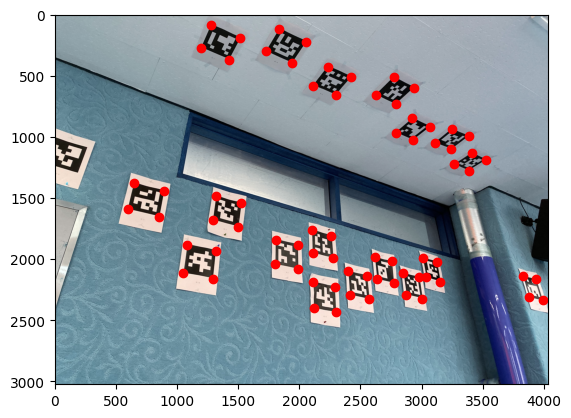

In [112]:
plt.imshow(image_1)
plt.scatter(matching_corners_1[:, 0], matching_corners_1[:, 1], c='r')
plt.show()

In [58]:
3.28261164e3, 2.02403056e3, 3.28885353e3, 1.45308413e3, 1
3282.61164 2024.03056 3288.85353 1453.08413 1

(3282.61164, 2024.03056, 3288.85353, 1453.08413, 1)

In [116]:

with open('match.txt', 'w') as output:
    output.write(f'{image_1_dir}\n')
    output.write(f'{image_2_dir}\n')
    output.write(f'{len(_matching_ids)}\n')
    output.write(" ".join(map(str, np.array(matching_idx_1).reshape(-1, ))) + '\n')
    output.write(" ".join(map(str, np.array(matching_idx_2).reshape(-1, ))) + '\n')